[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ashrafalaghbari/GA-TCN-LSTM/blob/main/Data_pre-processing/data_cleaning.ipynb)


In [442]:
%autosave 60

Autosaving every 60 seconds


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import oil_data_cleaner
importlib.reload(oil_data_cleaner)
from oil_data_cleaner import OilDataCleaner

In [2]:
%cd D:\UKM\Research project\oil production forecasting\github\GA-TCN-LSTM\Datasets

D:\UKM\Research project\oil production forecasting\github\GA-TCN-LSTM\Datasets


In [3]:
df = pd.read_csv("F_14.csv",  parse_dates=["DATEPRD"], index_col="DATEPRD")

In [6]:
# Check the summary statisctics to understand how the data looks like and what variables need to be cleaned
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ON_STREAM_HRS,1828.0,2.184119e+01,6.049317e+00,0.000000,2.400000e+01,2.400000e+01,2.400000e+01,2.500000e+01
AVG_DOWNHOLE_PRESSURE,1828.0,3.583535e+03,3.736376e+02,0.000000,3.507718e+03,3.573179e+03,3.730074e+03,4.395827e+03
AVG_DOWNHOLE_TEMPERATURE,1828.0,2.146251e+02,1.601213e+01,32.000000,2.120452e+02,2.147617e+02,2.199967e+02,2.241909e+02
AVG_DP_TUBING,1828.0,3.019579e+03,3.544794e+02,39.914966,2.869027e+03,2.985325e+03,3.208013e+03,4.381732e+03
AVG_ANNULUS_PRESS,1764.0,1.500441e+02,1.490430e+02,0.000000,0.000000e+00,1.665043e+02,3.122287e+02,3.869932e+02
AVG_CHOKE_SIZE_P,1802.0,7.592665e+01,2.784896e+01,0.000000,5.820964e+01,8.792593e+01,1.000000e+02,1.000000e+02
AVG_WHP_P,1828.0,5.725364e+02,2.193123e+02,4.962176,4.668374e+02,5.025752e+02,6.080249e+02,1.823394e+03
AVG_WHT_P,1828.0,1.830155e+02,2.914898e+01,33.784862,1.869712e+02,1.898920e+02,1.925296e+02,2.003173e+02
DP_CHOKE_SIZE,1828.0,1.522701e+02,2.390019e+02,0.914898,4.219301e+01,7.684254e+01,1.640220e+02,1.823394e+03
BORE_OIL_VOL,1828.0,7.261419e+03,5.028466e+03,0.000000,2.982109e+03,6.274401e+03,1.118668e+04,2.000594e+04


In [7]:
# remove average annulur pressure and pressure drop across the wellbore
df = df.drop(["AVG_ANNULUS_PRESS", "AVG_DP_TUBING"], axis=1)

In [8]:
# All variables have to be postive
df= np.abs(df)
# replace duplciated rows with NaN so that we can interpolate them later
df[df.duplicated()] = np.nan

# Outliers analysis

We will use the `OilDataCleaner` class to identify and treat outliers in the data.

In [9]:
# Creating an instance of the OilDataCleaner class and passing the df DataFrame as an argument
clean = OilDataCleaner(df)

* Production on stream hours 

In [8]:
# Detecting outliers in the 'ON_STREAM_HRS' variable
ON_STREAM_HRS_outliers = clean.detect_outliers_in_time('ON_STREAM_HRS', 'BORE_OIL_VOL')
ON_STREAM_HRS_outliers 

DATEPRD
2010-10-31    25.00000
2012-09-15     0.95833
2013-10-27    24.30833
2014-10-26    25.00000
Name: ON_STREAM_HRS, dtype: float64

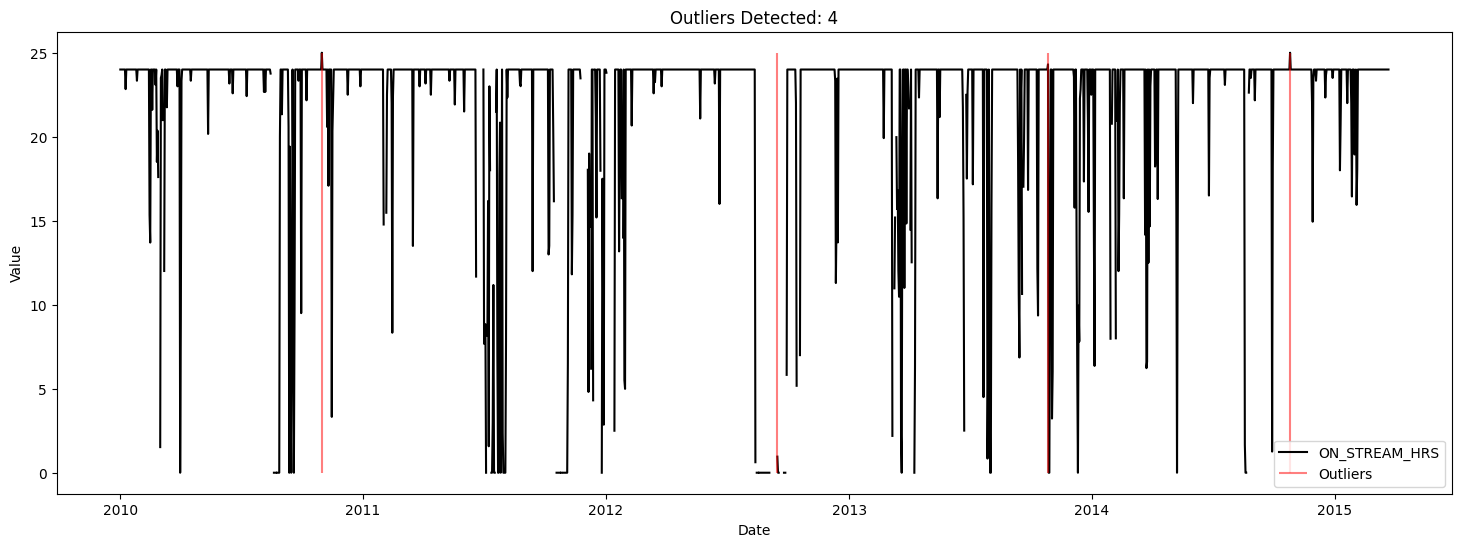

In [9]:
# Plotting the outliers detected in the 'ON_STREAM_HRS' variable
clean.plot_outliers('ON_STREAM_HRS', ON_STREAM_HRS_outliers, color='red', alpha=0.5)

* Injection on stream hours for well F_4

In [10]:
# Detecting outliers in the 'F_4_ON_STREAM_HRS' variable
F_4_ON_STREAM_HRS_outliers = clean.detect_outliers_in_time('F_4_ON_STREAM_HRS', 'F_4_BORE_WI_VOL')
F_4_ON_STREAM_HRS_outliers

DATEPRD
2010-08-16     1.75833
2012-01-03    11.22500
2013-10-27    24.14167
2014-10-26    25.00000
Name: F_4_ON_STREAM_HRS, dtype: float64

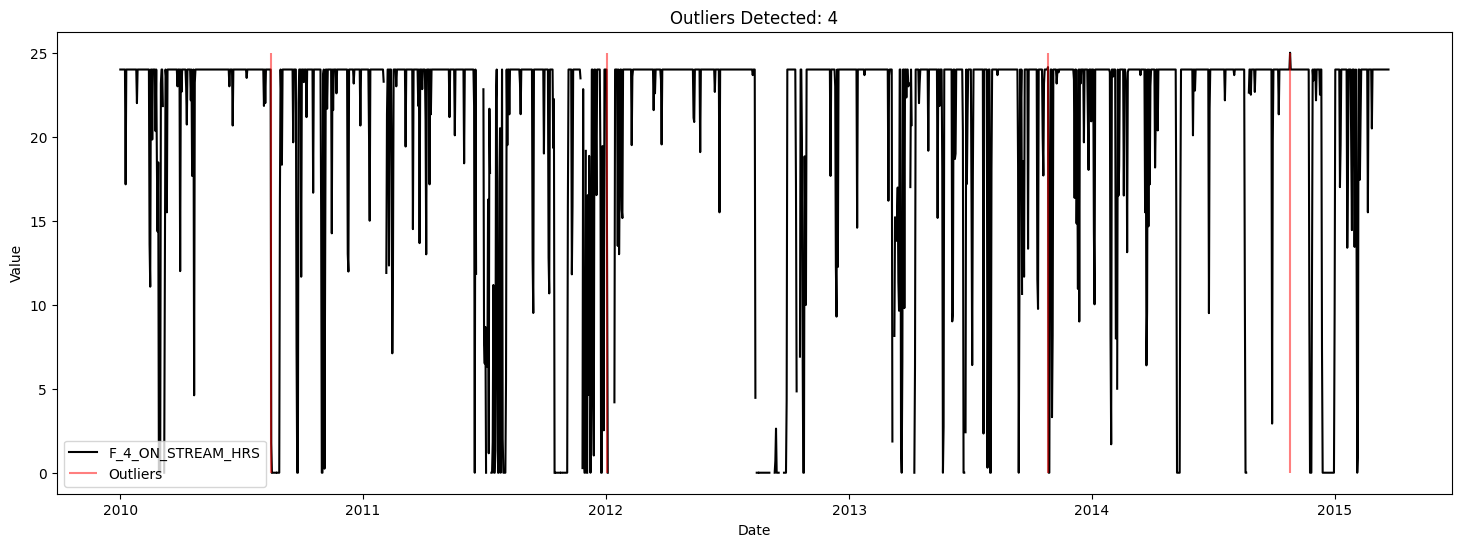

In [11]:
# Plotting the outliers detected in the 'F_4_ON_STREAM_HRS' variable
clean.plot_outliers('F_4_ON_STREAM_HRS', F_4_ON_STREAM_HRS_outliers, color='red', alpha=0.5, legend_loc='lower left')

* Injection on stream hours for well F_5

In [12]:
# Detecting outliers in the 'F_5_ON_STREAM_HRS' variable
F_5_ON_STREAM_HRS_outliers = clean.detect_outliers_in_time('F_5_ON_STREAM_HRS', 'F_5_BORE_WI_VOL')
F_5_ON_STREAM_HRS_outliers

DATEPRD
2010-10-31    25.00000
2012-01-03    11.22500
2013-03-14     0.16667
2013-10-27    24.14167
2014-10-26    25.00000
Name: F_5_ON_STREAM_HRS, dtype: float64

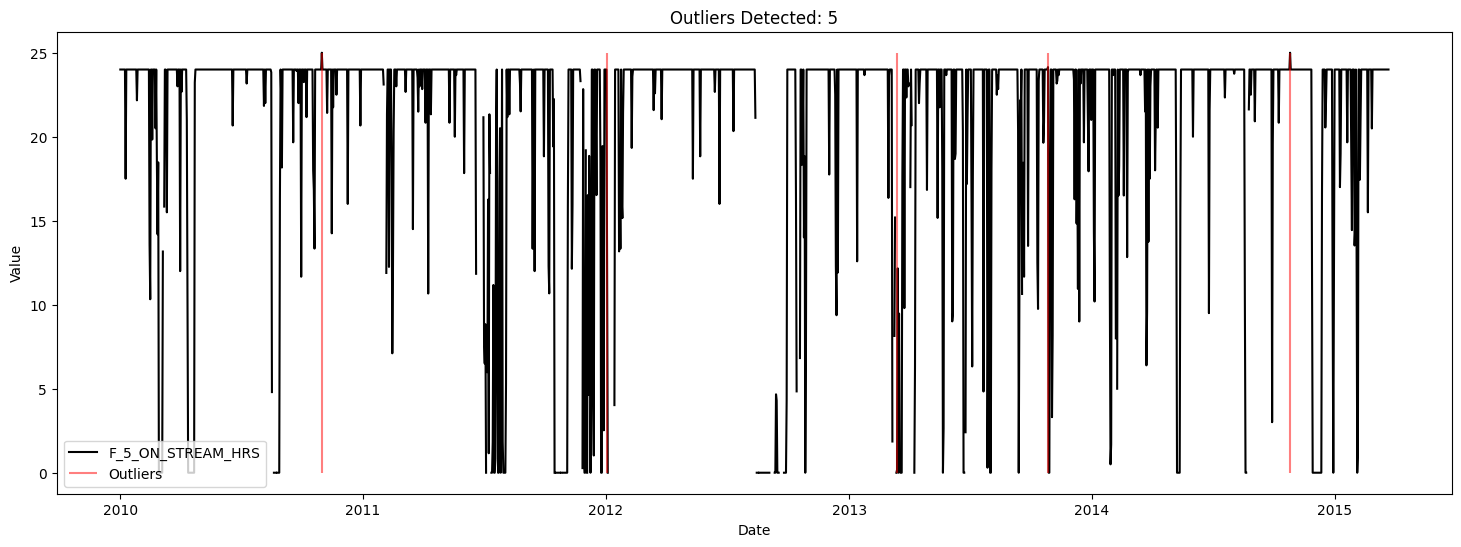

In [13]:
# Plotting the outliers detected in the 'F_5_ON_STREAM_HRS' variable
clean.plot_outliers('F_5_ON_STREAM_HRS', F_5_ON_STREAM_HRS_outliers, color='red', alpha=0.5, legend_loc='lower left')

* Oil production rate

In [14]:
# Detecting outliers in the 'BORE_OIL_VOL' variable
BORE_OIL_VOL_outliers = clean.detect_outliers_in_rate('BORE_OIL_VOL', 'ON_STREAM_HRS')
BORE_OIL_VOL_outliers

'No outliers detected.'

* Gas production rate

In [15]:
# Plotting the outliers detected in the 'BORE_GAS_VOL' variable
BORE_GAS_VOL_outliers = clean.detect_outliers_in_rate('BORE_GAS_VOL', 'ON_STREAM_HRS')
BORE_GAS_VOL_outliers

2011-12-26    1991.04091
dtype: float64

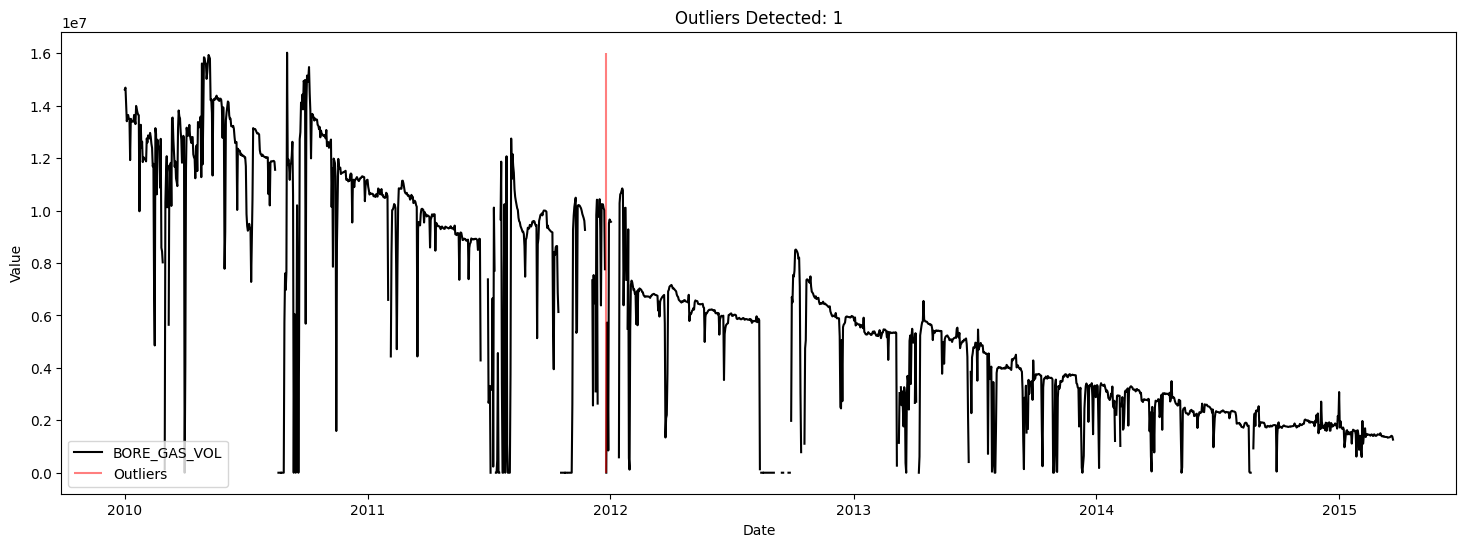

In [16]:
# Plotting the outliers detected in the 'BORE_GAS_VOL' variable
clean.plot_outliers('BORE_GAS_VOL', BORE_GAS_VOL_outliers, color='red', alpha=0.5, legend_loc='lower left')

* Water production rate

In [17]:
# Detecting outliers in the 'BORE_WAT_VOL' variable
BORE_WAT_VOL_outliers = clean.detect_outliers_in_rate('BORE_WAT_VOL', 'ON_STREAM_HRS')
BORE_WAT_VOL_outliers

2011-12-26    283.796254
dtype: float64

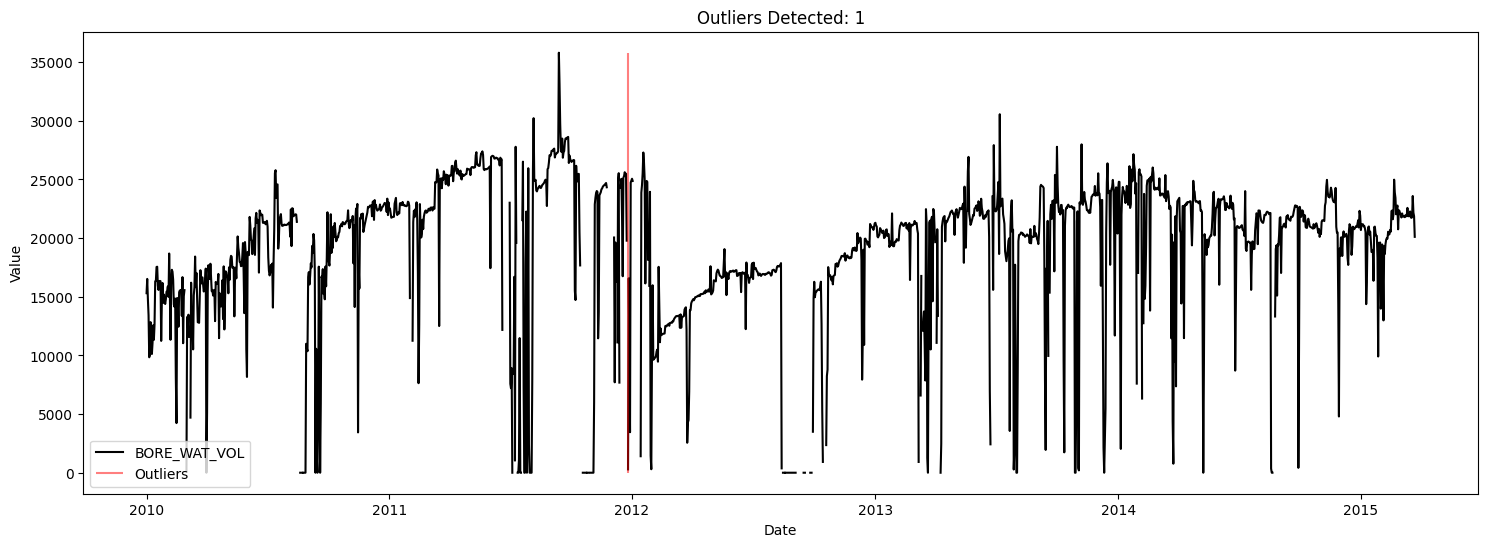

In [18]:
# Plotting the outliers detected in the 'BORE_WAT_VOL' variable
clean.plot_outliers('BORE_WAT_VOL', BORE_WAT_VOL_outliers, color='red', alpha=0.5, legend_loc='lower left')

* Injected water volume for well F_4

In [19]:
# Detecting outliers in the 'F_4_BORE_WI_VOL' variable
F_4_BORE_WI_VOL_outliers = clean.detect_outliers_in_rate('F_4_BORE_WI_VOL', 'F_4_ON_STREAM_HRS')
F_4_BORE_WI_VOL_outliers 

2011-06-18    39397.438554
2011-10-18        0.050615
2011-11-30        0.286821
2011-12-01        0.079087
2011-12-09        0.131798
2011-12-25        6.154214
2012-01-04        0.017697
2013-10-29        0.933075
2014-05-12        0.181665
2014-11-25        0.588158
2014-12-18        0.848026
2014-12-20        0.560447
2014-12-21        1.454727
dtype: float64

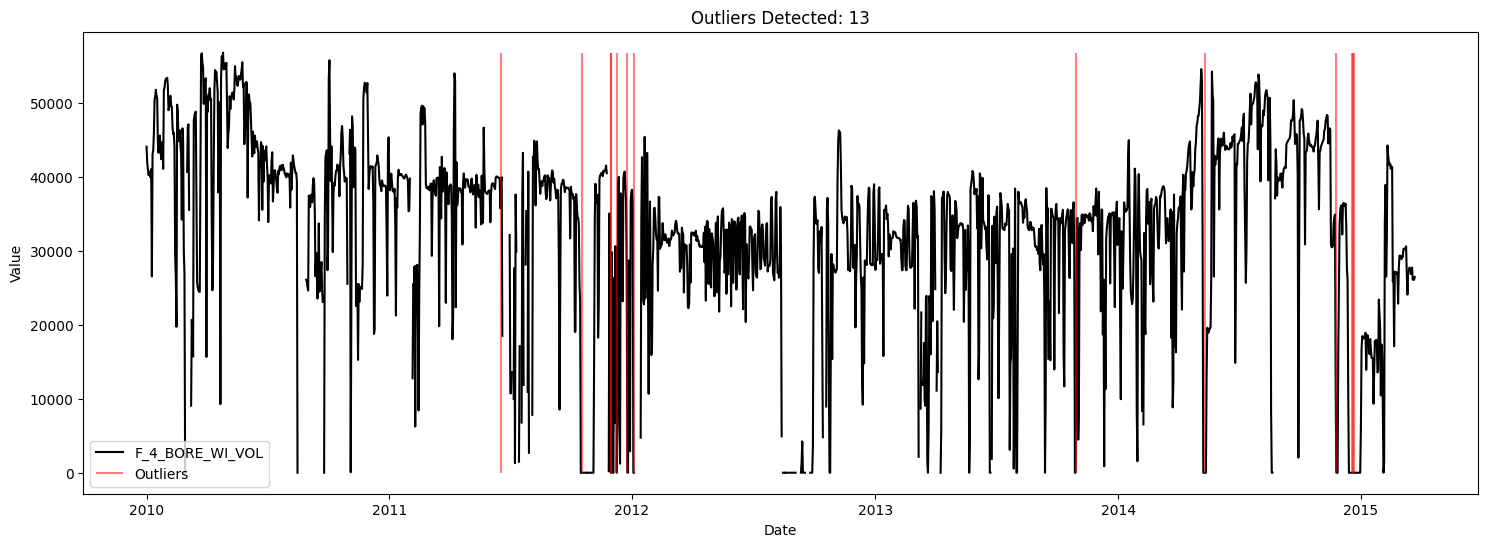

In [20]:
#  Plotting the outliers detected in the 'F_4_BORE_WI_VOL' variable
clean.plot_outliers('F_4_BORE_WI_VOL', F_4_BORE_WI_VOL_outliers, color='red', alpha=0.5, legend_loc='lower left')

* Injected water volume for well F_5

In [21]:
#  Detecting outliers in the 'F_5_BORE_WI_VOL' variable
F_5_BORE_WI_VOL_outliers = clean.detect_outliers_in_rate('F_5_BORE_WI_VOL', 'F_5_ON_STREAM_HRS')
F_5_BORE_WI_VOL_outliers

2011-10-16    305.362879
2011-12-04    285.475393
2011-12-25    344.680181
2011-12-26    357.603417
2012-09-28    357.261068
2013-03-16    935.012652
2013-03-19    591.242196
2013-06-22    404.652589
2013-06-23    378.568852
2013-10-29    391.141490
2014-11-29    311.908831
2014-12-05    153.215910
2015-02-04    184.791247
dtype: float64

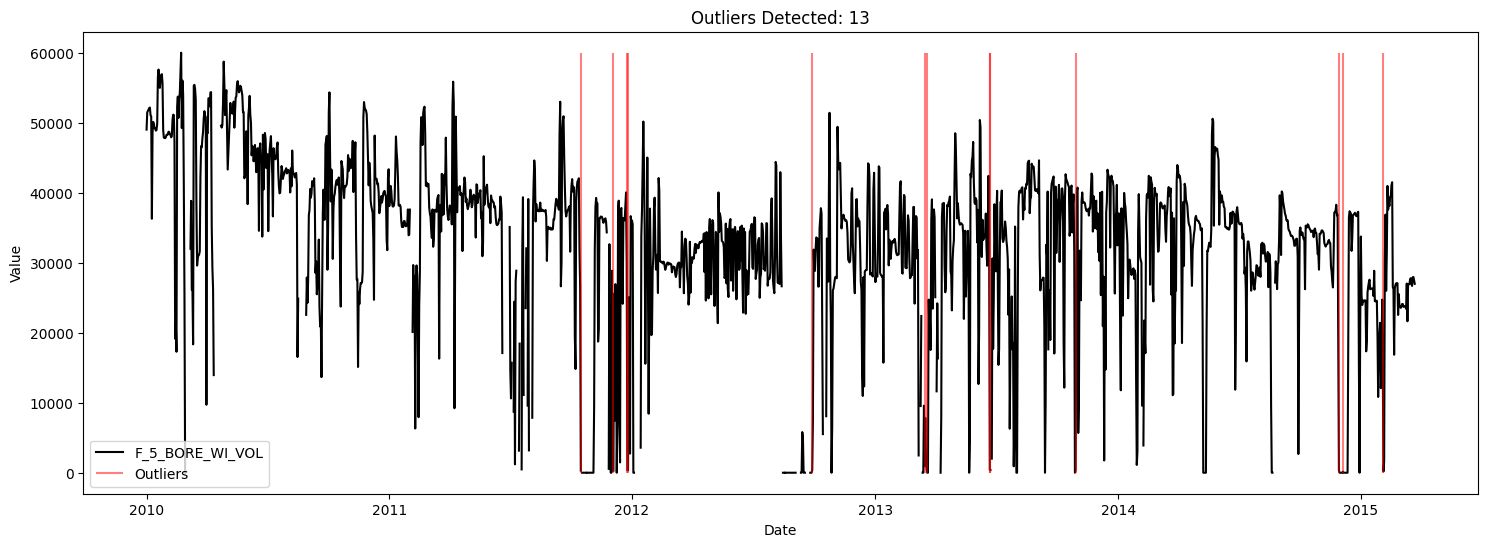

In [22]:
# Plotting the outliers detected in the 'F_5_BORE_WI_VOL' variable
clean.plot_outliers('F_5_BORE_WI_VOL', F_5_BORE_WI_VOL_outliers, color='red', alpha=0.5, legend_loc='lower left')

* Average downhole pressure

In [25]:
# We will detecting outliers in the 'AVG_DOWNHOLE_PRESSURE' variable using the default method 'Identify the proper roc (rate of change)
# by calculating the quantile in each window'
AVG_DOWNHOLE_PRESSURE_outliers = clean.detect_outliers_with_roc('AVG_DOWNHOLE_PRESSURE', window_size= 180, verbose=True)

Number of intervals: 10
The rate of change for segment [2010-01-01, 2010-06-30] is 295.28 with a mean of 3532.92
The rate of change for segment [2010-06-30, 2010-12-27] is 144.31 with a mean of 3596.09
The rate of change for segment [2010-12-27, 2011-06-25] is 159.55 with a mean of 3542.98
The rate of change for segment [2011-06-25, 2011-12-22] is 404.01 with a mean of 3559.52
The rate of change for segment [2011-12-22, 2012-06-19] is 328.31 with a mean of 3300.47
The rate of change for segment [2012-06-19, 2012-12-16] is 343.99 with a mean of 3408.32
The rate of change for segment [2012-12-16, 2013-06-14] is 192.96 with a mean of 3526.02
The rate of change for segment [2013-06-14, 2013-12-11] is 298.35 with a mean of 3614.94
The rate of change for segment [2013-12-11, 2014-06-09] is 197.88 with a mean of 3711.29
The rate of change for segment [2014-06-09, 2015-03-23] is 78.44 with a mean of 3800.8
Rate of change for each window of size 180 is: [295.28, 144.31, 159.55, 404.01, 328.31, 

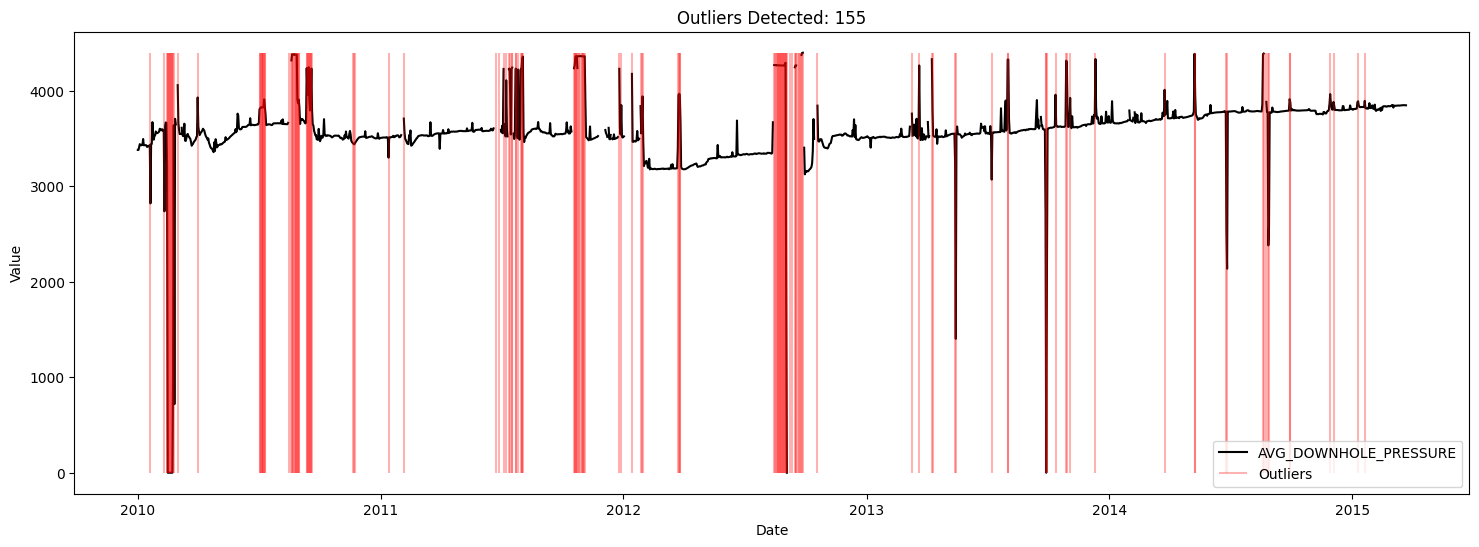

In [24]:
# Plotting the outliers detected in the 'AVG_DOWNHOLE_PRESSURE' variable
clean.plot_outliers('AVG_DOWNHOLE_PRESSURE', AVG_DOWNHOLE_PRESSURE_outliers, color='red', alpha=0.3, legend_loc='lower right')

In [26]:
# Based on domain knowledge, We will take the rate of change for each windown execpt the last one since they dont seam to be outliers
# This is becasue most observations in the last window are  gradually increasing compared to observations in other windows; therefore,
# the computed rate of change is not that high and any observations above or below this boundary  
# (roc ± mean of the respective windw) are considered outliers
# We will change the rate of change for the last window to 197 same as the previous window
AVG_DOWNHOLE_PRESSURE_outliers = clean.detect_outliers_with_roc('AVG_DOWNHOLE_PRESSURE', window_size= 180, 
                                        rate_of_change= [295.28, 144.31, 159.55, 404.01, 328.31, 343.99, 192.96, 298.35, 197.88, 197.88])

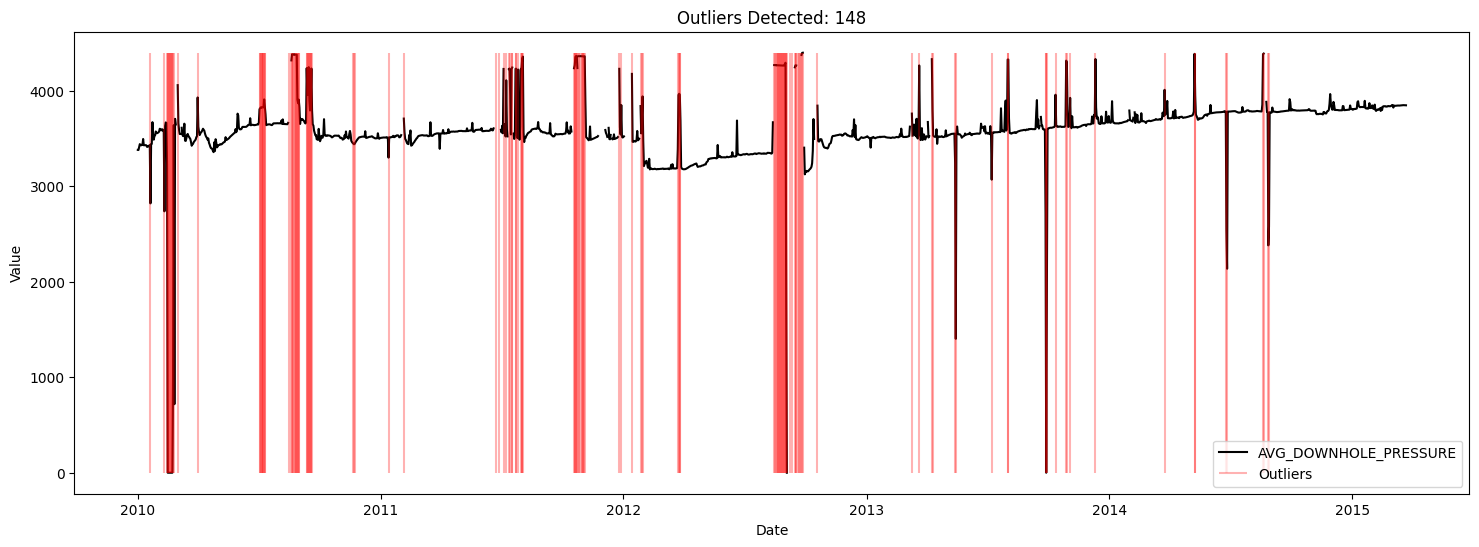

In [468]:
# Plotting the outliers detected in the 'AVG_DOWNHOLE_PRESSURE' variable
clean.plot_outliers('AVG_DOWNHOLE_PRESSURE', AVG_DOWNHOLE_PRESSURE_outliers, color='red', alpha=0.3, legend_loc='lower right')

* Average downhole temperature

In [27]:
# We will detecting outliers in the 'AVG_DOWNHOLE_TEMPERATURE' variable using the default method same as the previous variable
AVG_DOWNHOLE_TEMPERATURE_outliers = clean.detect_outliers_with_roc('AVG_DOWNHOLE_TEMPERATURE', window_size= 180, verbose=True)

Number of intervals: 10
The rate of change for segment [2010-01-01, 2010-06-30] is 5.73 with a mean of 223.15
The rate of change for segment [2010-06-30, 2010-12-27] is 5.86 with a mean of 222.56
The rate of change for segment [2010-12-27, 2011-06-25] is 4.95 with a mean of 220.16
The rate of change for segment [2011-06-25, 2011-12-22] is 5.99 with a mean of 216.57
The rate of change for segment [2011-12-22, 2012-06-19] is 2.65 with a mean of 218.23
The rate of change for segment [2012-06-19, 2012-12-16] is 0.68 with a mean of 214.44
The rate of change for segment [2012-12-16, 2013-06-14] is 3.83 with a mean of 213.77
The rate of change for segment [2013-06-14, 2013-12-11] is 2.38 with a mean of 212.61
The rate of change for segment [2013-12-11, 2014-06-09] is 1.5 with a mean of 211.99
The rate of change for segment [2014-06-09, 2015-03-23] is 1.45 with a mean of 211.44
Rate of change for each window of size 180 is: [5.73, 5.86, 4.95, 5.99, 2.65, 0.68, 3.83, 2.38, 1.5, 1.45]
Variable: 

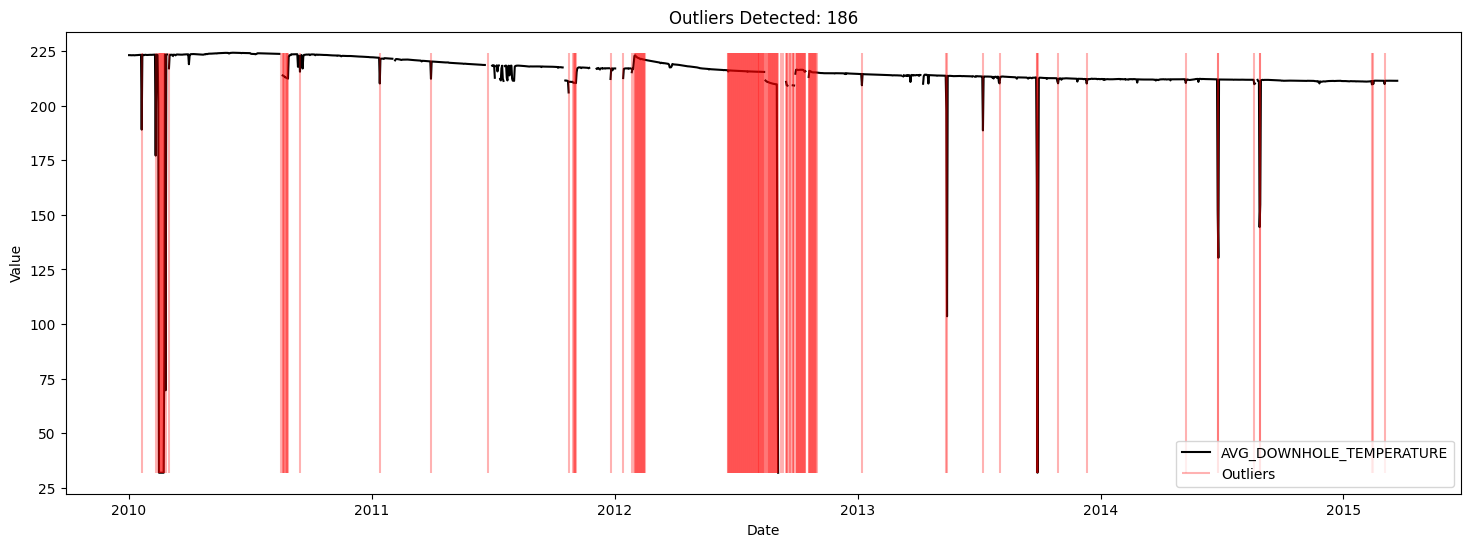

In [470]:
# Plotting the outliers detected in the 'AVG_DOWNHOLE_TEMPERATURE' variable
clean.plot_outliers('AVG_DOWNHOLE_TEMPERATURE', AVG_DOWNHOLE_TEMPERATURE_outliers, color='red', alpha=0.3, legend_loc='lower right')

In [28]:
# Most of the values detected on the previous plot are not outliers; therefore, we will take the maximum rate of change, 5.99, and set it for all windows
AVG_DOWNHOLE_TEMPERATURE_outliers = clean.detect_outliers_with_roc('AVG_DOWNHOLE_TEMPERATURE', window_size= 180, 
                                        rate_of_change= [5.99], all_same_rate=True)

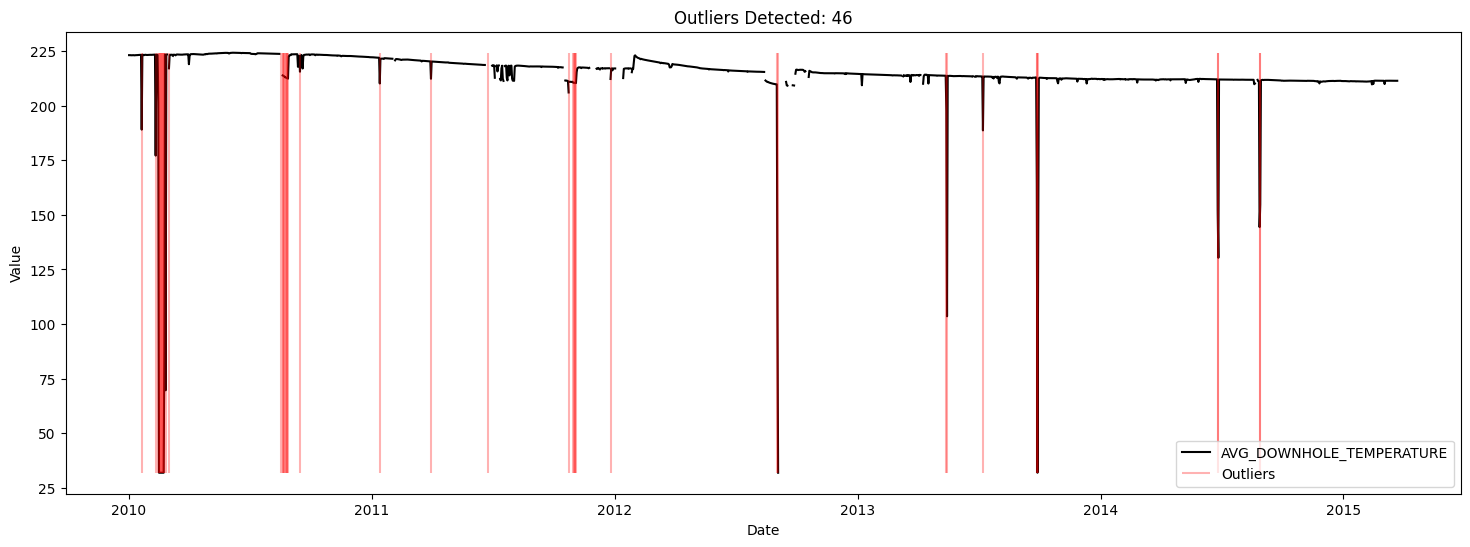

In [29]:
# Voilà! these values are outliers
clean.plot_outliers('AVG_DOWNHOLE_TEMPERATURE', AVG_DOWNHOLE_TEMPERATURE_outliers, color='red', alpha=0.3, legend_loc='lower right')

* Average wellhead temperature

In [30]:
AVG_WHT_P_outliers = clean.detect_outliers_with_roc('AVG_WHT_P', window_size= 180)

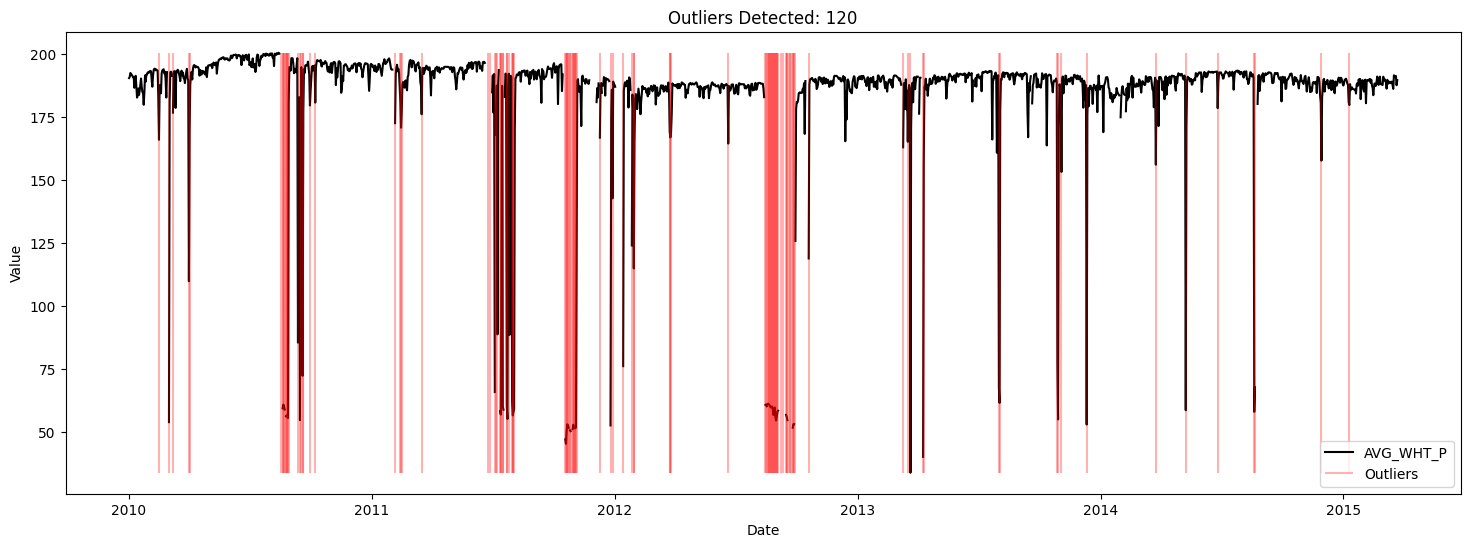

In [31]:
clean.plot_outliers('AVG_WHT_P', AVG_WHT_P_outliers, color='red', alpha=0.3, legend_loc='lower right')

We will not modify the rate of change for `wellhead temperature` here becasue all values are actually outliers.

* Average choke size

In [475]:
AVG_CHOKE_SIZE_P_outliers = clean.detect_outliers_in_choke('AVG_CHOKE_SIZE_P', 'ON_STREAM_HRS')

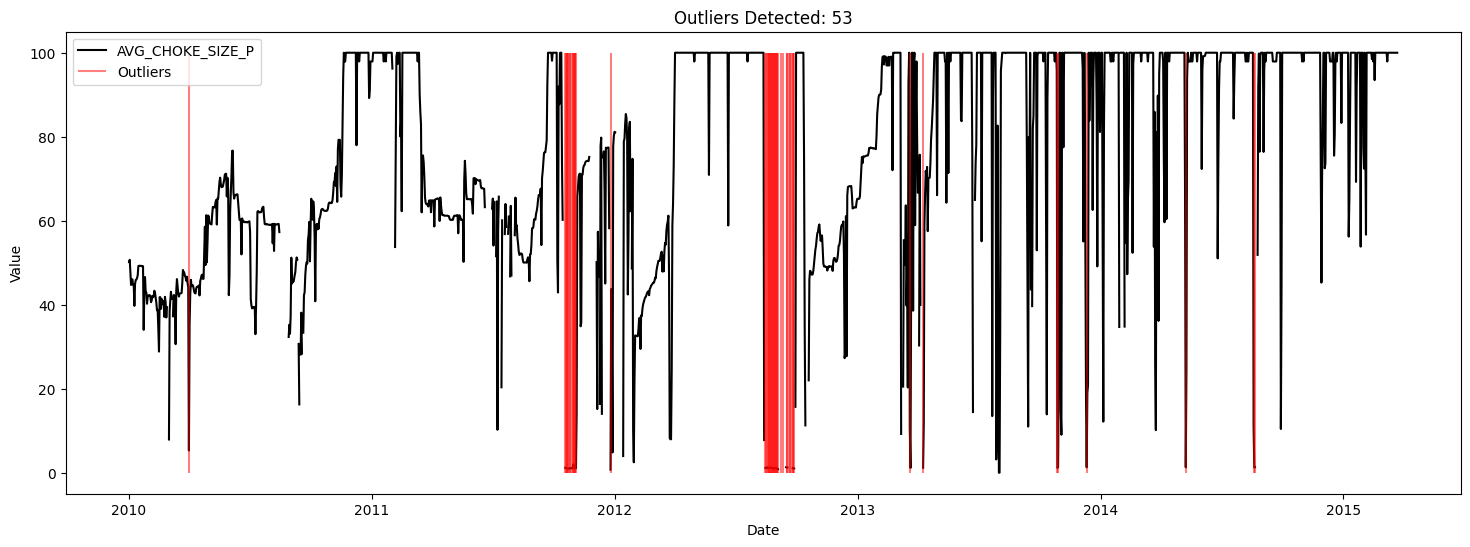

In [476]:
clean.plot_outliers('AVG_CHOKE_SIZE_P', AVG_CHOKE_SIZE_P_outliers, color='red', alpha=0.5)

# Outliers treatment

Based on our findings, we will now remove the outliers for all variables.

In [477]:
def treat_outliers(df):
    """Remove outliers from the data set"""

    # Make a copy of the data set to avoid changing the original data set
    data = df.copy()
    # Create an instance of the OilDataCleaner class
    clean = OilDataCleaner(data)
    # remove outliers in 'ON_STREAM_HRS' variables
    data['ON_STREAM_HRS'] =  clean.treat_outliers_in_time(data, 'ON_STREAM_HRS', 'BORE_OIL_VOL')
    # remove outliers in 'F_4_ON_STREAM_HRS'variable
    data['F_4_ON_STREAM_HRS'] =  clean.treat_outliers_in_time(data, 'F_4_ON_STREAM_HRS', 'F_4_BORE_WI_VOL')
    # remove outliers in 'F_5_ON_STREAM_HRS'variable
    data['F_5_ON_STREAM_HRS'] =  clean.treat_outliers_in_time(data, 'F_5_ON_STREAM_HRS', 'F_5_BORE_WI_VOL')
    # remove outliers in 'BORE_OIL_VOL' variable
    data['BORE_OIL_VOL'] =  clean.treat_outliers_in_rate(data, 'BORE_OIL_VOL', 'ON_STREAM_HRS')
    # remove outliers in 'BORE_GAS_VOL' variable
    data['BORE_GAS_VOL'] =  clean.treat_outliers_in_rate(data, 'BORE_GAS_VOL', 'ON_STREAM_HRS')
    # remove outliers in 'BORE_WAT_VOL' variable
    data['BORE_WAT_VOL'] =  clean.treat_outliers_in_rate(data, 'BORE_WAT_VOL', 'ON_STREAM_HRS')
    # remove outliers in 'F_4_BORE_WI_VOL' variable
    data['F_4_BORE_WI_VOL'] =  clean.treat_outliers_in_rate(data, 'F_4_BORE_WI_VOL', 'F_4_ON_STREAM_HRS')
    # remove outliers in 'F_5_BORE_WI_VOL' variable
    data['F_5_BORE_WI_VOL'] =  clean.treat_outliers_in_rate(data, 'F_5_BORE_WI_VOL', 'F_5_ON_STREAM_HRS')
    # Detect outliers in 'AVG_DOWNHOLE_PRESSURE' variable based on the optimal values of rate of change found in the outlier analysis section 
    AVG_DOWNHOLE_PRESSURE_outliers = clean.detect_outliers_with_roc('AVG_DOWNHOLE_PRESSURE', 
                                                                    window_size= 180, 
                                        rate_of_change= [295.28, 144.31, 159.55, 404.01, 328.31, 343.99, 192.96, 298.35, 197.88, 197])
    # Remove outliers in 'AVG_DOWNHOLE_PRESSURE' variable
    data['AVG_DOWNHOLE_PRESSURE'] =  clean.treat_outliers_with_roc(data, 
                                                                 'AVG_DOWNHOLE_PRESSURE', 
                                                                 AVG_DOWNHOLE_PRESSURE_outliers)
    
    # Detect outliers in 'AVG_DOWNHOLE_TEMPERATURE' variable based on the optimal values of rate of change found in the outlier analysis section
    AVG_DOWNHOLE_TEMPERATURE_outliers = clean.detect_outliers_with_roc('AVG_DOWNHOLE_TEMPERATURE', 
                                                                       window_size= 180, 
                                                                       rate_of_change= [5.99], 
                                                                       all_same_rate=True)
    # Remove outliers in 'AVG_DOWNHOLE_TEMPERATURE' variable
    data['AVG_DOWNHOLE_TEMPERATURE'] =  clean.treat_outliers_with_roc(data,
                                                                    'AVG_DOWNHOLE_TEMPERATURE', 
                                                                    AVG_DOWNHOLE_TEMPERATURE_outliers)

    #  Detect outliers in 'AVG_WHT_P' variable based on the optimal values of rate of change found in the outlier analysis section
    AVG_WHT_P_outliers = clean.detect_outliers_with_roc(data,
                                                        'AVG_WHT_P', 
                                                        window_size= 180)
    data['AVG_WHT_P'] =  clean.treat_outliers_with_roc(data,
                                                     'AVG_WHT_P', 
                                                     AVG_WHT_P_outliers)
    
    # Remove outliers in 'AVG_CHOKE_SIZE_P' variable 
    data['AVG_CHOKE_SIZE_P'] =  clean.treat_outliers_in_choke(data,'AVG_CHOKE_SIZE_P', 'ON_STREAM_HRS')

    data['AVG_WHP_P'] = data['AVG_WHP_P'].interpolate(method='linear', limit_direction='both')
    data['DP_CHOKE_SIZE'] = data['DP_CHOKE_SIZE'].interpolate(method='linear', limit_direction='both')

    return data

In [478]:
# Remove outliers from the data set
df = treat_outliers(df)

In [482]:
# Check the summary statistics of the data set again to see if the outliers have been removed and statistical properties of the data set have been improved
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ON_STREAM_HRS,1908.0,2.131509e+01,6.603978e+00,0.000000,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01
AVG_DOWNHOLE_PRESSURE,1908.0,3.576953e+03,1.576521e+02,3123.138842,3.508076e+03,3.570207e+03,3.674309e+03,3.963025e+03
AVG_DOWNHOLE_TEMPERATURE,1908.0,2.162475e+02,4.509110e+00,209.122718,2.120700e+02,2.148129e+02,2.202264e+02,2.241909e+02
AVG_CHOKE_SIZE_P,1908.0,7.387700e+01,2.888608e+01,0.000000,5.413018e+01,7.776745e+01,1.000000e+02,1.000000e+02
AVG_WHP_P,1908.0,5.826448e+02,2.369819e+02,4.962176,4.669124e+02,5.091011e+02,6.257201e+02,1.823394e+03
AVG_WHT_P,1908.0,1.896100e+02,4.923431e+00,160.659549,1.871786e+02,1.899252e+02,1.925296e+02,2.003173e+02
DP_CHOKE_SIZE,1908.0,1.659621e+02,2.602976e+02,0.914898,4.255220e+01,8.167230e+01,1.787764e+02,1.823394e+03
BORE_OIL_VOL,1908.0,7.104866e+03,5.023856e+03,0.000000,2.835069e+03,6.121653e+03,1.093925e+04,2.000594e+04
BORE_GAS_VOL,1908.0,6.013343e+06,4.127598e+06,0.000000,2.346537e+06,5.466016e+06,9.490638e+06,1.602415e+07
BORE_WAT_VOL,1908.0,1.839815e+04,6.821270e+03,0.000000,1.616590e+04,2.063322e+04,2.267823e+04,3.580016e+04


In [ ]:
# Save the cleaned data set to a csv file 
df.to_csv('cleaned_F_14.csv')